<a href="https://colab.research.google.com/github/danielcdo/-MachineLearning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Import Python packages


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import pylab as pl

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from math import sqrt

**Download the dataset**

Details: car's engine vs CO2 emmition - FuelConsumptionCo2.csv

In [ ]:
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv

--2020-11-14 02:20:47--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.005s  

2020-11-14 02:20:47 (15.0 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



# Dataset as a Pandas Dataframe

In [ ]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [ ]:
df.head()
df.describe()
#df.columns

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


**Sub-set Dataframe**: only 1 feature and CO2 emmission

Feature: ENGINESIZE

Label/predicted: CO2EMISSIONS

Features & labels must have the same size!!

In [ ]:
feature_motor = df[['ENGINESIZE']]
label_co2 =  df[['CO2EMISSIONS']]



In [ ]:
feature_motor.describe()
label_co2.describe()

,ENGINESIZE
count,1067.000000
mean,3.346298
std,1.415895
min,1.000000
25%,2.000000
50%,3.400000
75%,4.300000
max,8.400000


# Applying machine learning methods!!

1st: split the dataset in training & test using sklearn library

In [ ]:
feature_motor_training, feature_motor_test, label_co2_training, label_co2_test = train_test_split(feature_motor, label_co2, test_size=0.2, random_state = 42)
print('Checking the type of the the training dataset:', type(feature_motor_training))

Checking the type of the the training dataset: <class 'pandas.core.frame.DataFrame'>


Checking the data correlation between engine feature and CO2 emmision.

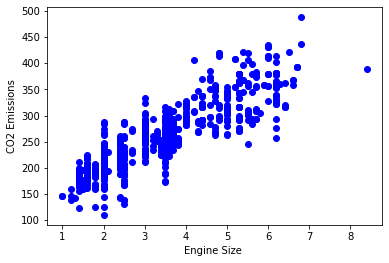

In [ ]:
plt.scatter(feature_motor_training, label_co2_training, color='blue')
plt.xlabel('Engine Size ')
plt.ylabel('CO2 Emissions')
plt.show()

2nd: Let's now training the **Linear Regression** model

In [ ]:
# Create linear regression object
lr = linear_model.LinearRegression()

# fiftting/training the model using the training set
lr.fit(feature_motor_training, label_co2_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model already fitted/trained and ready to be used!!

In [ ]:
# Showing te calculated values: intercept and angular coeficient

print('(A) Intercept:', lr.intercept_)
print('(B) Angular Coeficient:', lr.coef_)

(A) Intercept: [126.28970217]
(B) Angular Coeficient: [[38.99297872]]


Intercetp & Angular Coeficient calculated are related with the training data plotted above!!

# Showing the fitted line for the linear model against the training dataset

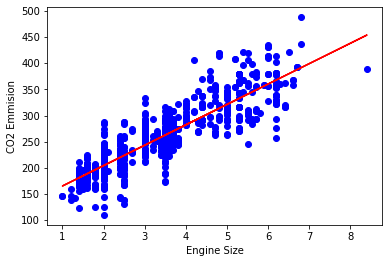

In [ ]:
plt.scatter(feature_motor_training, label_co2_training, color='blue')
plt.plot(feature_motor_training, lr.coef_[0][0]*feature_motor_training + lr.intercept_[0], '-r')
plt.ylabel('CO2 Emmision')
plt.xlabel('Engine Size')
plt.show()

# Making predictions using the testing set
Linear Model against the testing set

In [ ]:
co2_pred = lr.predict(feature_motor_test)

# Showing the fitted line for the linear model against the test dataset

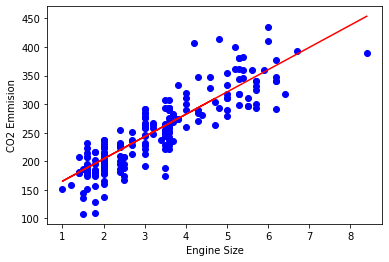

In [ ]:
plt.scatter(feature_motor_test, label_co2_test, color='blue')
plt.plot(feature_motor_test, lr.coef_[0][0]*feature_motor_test + lr.intercept_[0], '-r')
plt.ylabel('CO2 Emmision')
plt.xlabel('Engine Size')
plt.show()


# Model Metrics

- **MSE**: mean squared error
- **MAE**: mean absolute error

In [ ]:
print('SSE: %2.f' % np.sum((co2_pred - label_co2_test)**2))
print('MSE: %2.f' % mean_squared_error(label_co2_test, co2_pred))
print('MAE: %2.f' % mean_absolute_error(label_co2_test, co2_pred))
print('RMSE: %2.f' % sqrt(mean_squared_error(label_co2_test, co2_pred)))
print('R2 Score: %2.f' % r2_score(co2_pred, label_co2_test))

SSE: 210991
MSE: 986
MAE: 24
RMSE: 31
R2 Score:  1


**Reference**: https://github.com/diogocortiz/Crash-Course-IA/blob/master/RegressaoLinear/CrashCourse_Regressão_Linear.ipynb